# Twin-T型発振回路

## ノッチフィルタの伝達関数

In [1]:
## ノッチフィルタ
s, R1, R2, R3, C1, C2, C3 = var('s R1 R2 R3 C1 C2 C3')

H =( s^3*R1*R2*R3*C1*C2*C3 + s^2*(R2*R3*C2*C3  + R1*R3*C2*C3) + s*(C2*R3 + C3*R3) + 1)/(s^3*(C1*C2*C3*R1*R2*R3) + s^2*(C1*C3*R1*R2 + C2*C3*R1*R3 + C2*C3*R2*R3 + C1*C2*R1*R3 + C1*C3*R1*R3) + s*(C3*R1 + C3*R2 + C2*R3 + C1*R1 + C3*R3) + 1)

In [2]:
show(H)

(C1*C2*C3*R1*R2*R3*s^3 + (C2*C3*R1*R3 + C2*C3*R2*R3)*s^2 + (C2*R3 + C3*R3)*s + 1)/(C1*C2*C3*R1*R2*R3*s^3 + (C1*C3*R1*R2 + C1*C2*R1*R3 + C1*C3*R1*R3 + C2*C3*R1*R3 + C2*C3*R2*R3)*s^2 + (C1*R1 + C3*R1 + C3*R2 + C2*R3 + C3*R3)*s + 1)

In [3]:
f = var('f')
vals = {s: 2*i*pi*f,  R1: 10^4, R2: 10^4, R3:10^3, C1:10^-7, C2: 10^-8, C3:5*10^-8}

h(f) = H.subs(vals)

# 電気ではデジベルで表示するため、toDb関数を定義する
def toDb(v):
    return 20*log(abs(v), 10) 

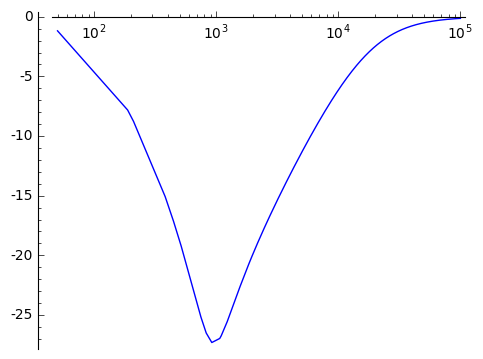

In [4]:
plot(toDb(h(f)), [f, 50, 10^5], scale="semilogx", plot_points=1024, figsize=5)

### フィルタ計算ツールとのクロスチェック
以下のサイトのフィルタの伝達関数とのクロスチェックし、一致することを確認しました。
- http://sim.okawa-denshi.jp/TwinTCRtool.php

In [5]:
vals = {R1: 10^4, R2: 10^4, R3:10^3, C1:10^-7, C2: 10^-8, C3:5*10^-8}

hs(s) = H.subs(vals)
show(hs)

s |--> (s^3 + 2000*s^2 + 12000000*s + 200000000000)/(s^3 + 114000*s^2 + 412000000*s + 200000000000)

## ツインT型ノッチフィルタの伝達関数
以下のツインT型ノッチフィルタの伝達関数を求めてみます。

以下のサイトを参考にしました。
- [ツインＴノッチフィルタの解析](https://note.chiebukuro.yahoo.co.jp/detail/n327729?fr=pc_fb_share_n)

<img src="images/B25/Fig1.png" width="400" />

重ねの理を使って、Vo = Vo1 + Vo2に分解します。

<img src="images/B25/Fig2.png" width=400 />

Vo1を以下のようにVT, ZT, ZAに整理します。

<img src="images/B25/Fig3.png" width="400" />

R1とC1の間の電圧は、テブナンの定理から以下のようになります。

$$
V_T = V_i \frac{\frac{1}{s C_1}}{R_1 + \frac{1}{s C_1}}
$$

$$
Z_T = R_2 + \frac{\frac{1}{s C_1}}{R_1 + \frac{1}{s C_1}}
$$

$$
Z_A = \frac{1}{s C_3} + \frac{\frac{R_3}{s C_2}}{R_3 + \frac{1}{s C_2}}
$$

In [6]:
s, R1, R2, R3, C1, C2, C3 = var('s R1 R2 R3 C1 C2 C3')
VT, Vi, Vo, Vo1, Vo2, ZT, ZA = var('VT Vi Vo Vo1 Vo2 ZT ZA')

VT = Vi * (1/(s*C1)/(R1 + 1/(s*C1)))
ZT = R2 + (R1/(s*C1))/(R1+1/(s*C1))
ZA = 1/(s*C3) + (R3/(s*C2))/(R3 + 1/(s*C2))
show(VT); show(ZT); show(ZA)

Vi/(C1*(R1 + 1/(C1*s))*s)

R2 + R1/(C1*(R1 + 1/(C1*s))*s)

1/(C3*s) + R3/(C2*(R3 + 1/(C2*s))*s)

In [7]:
Vo1 = VT*ZA/(ZT+ZA)
show(Vo1)

Vi*(1/(C3*s) + R3/(C2*(R3 + 1/(C2*s))*s))/(C1*(R1 + 1/(C1*s))*(R2 + 1/(C3*s) + R1/(C1*(R1 + 1/(C1*s))*s) + R3/(C2*(R3 + 1/(C2*s))*s))*s)

Vo2は、vo1に以下の置換をすると求まります。

$$
R1 → 1/sC2, R2 → 1/sC3, R3 → 1/sC1
$$

$$
C1 → 1/sR3, C2 → 1/sR1, C3→ 1/sR2
$$

In [8]:
# 循環変換を避けるため、一旦R11, R22, R33, C11, C22, C33で置換
R11, R22, R33, C11, C22, C33 = var('R11 R22 R33 C11 C22 C33')
rel1= {R1: 1/(s*C22), R2: 1/(s*C33), R3: 1/(s*C11), C1: 1/(s*R33), C2: 1/(s*R11), C3 : 1/(s*R22)}
Vo2 = Vo1.subs(rel1)
show(Vo2)
# R1, R2, R3, C1, C2, C3に戻す
rel2 = {R11: R1, R22: R2, R33: R3, C11: C1, C22: C2, C33:C3}
Vo2 = Vo2.subs(rel2)
show(Vo2)

(R22 + R11/(C11*(R11 + 1/(C11*s))*s))*R33*Vi/((R22 + 1/(C33*s) + R11/(C11*(R11 + 1/(C11*s))*s) + R33/(C22*(R33 + 1/(C22*s))*s))*(R33 + 1/(C22*s)))

(R2 + R1/(C1*(R1 + 1/(C1*s))*s))*R3*Vi/((R2 + 1/(C3*s) + R1/(C1*(R1 + 1/(C1*s))*s) + R3/(C2*(R3 + 1/(C2*s))*s))*(R3 + 1/(C2*s)))

In [9]:
Vo = Vo1 + Vo2
show(Vo)

(R2 + R1/(C1*(R1 + 1/(C1*s))*s))*R3*Vi/((R2 + 1/(C3*s) + R1/(C1*(R1 + 1/(C1*s))*s) + R3/(C2*(R3 + 1/(C2*s))*s))*(R3 + 1/(C2*s))) + Vi*(1/(C3*s) + R3/(C2*(R3 + 1/(C2*s))*s))/(C1*(R1 + 1/(C1*s))*(R2 + 1/(C3*s) + R1/(C1*(R1 + 1/(C1*s))*s) + R3/(C2*(R3 + 1/(C2*s))*s))*s)

In [10]:
h_hat = Vo/Vi
show(h_hat)

((R2 + R1/(C1*(R1 + 1/(C1*s))*s))*R3*Vi/((R2 + 1/(C3*s) + R1/(C1*(R1 + 1/(C1*s))*s) + R3/(C2*(R3 + 1/(C2*s))*s))*(R3 + 1/(C2*s))) + Vi*(1/(C3*s) + R3/(C2*(R3 + 1/(C2*s))*s))/(C1*(R1 + 1/(C1*s))*(R2 + 1/(C3*s) + R1/(C1*(R1 + 1/(C1*s))*s) + R3/(C2*(R3 + 1/(C2*s))*s))*s))/Vi

In [11]:
show(h_hat.subs(vals).simplify_full())

(s^3 + 2000*s^2 + 12000000*s + 200000000000)/(s^3 + 114000*s^2 + 412000000*s + 200000000000)